### Documentation pour l'article : 
* https://codecrucks.com/what-is-fuzzy-membership-function-complete-guide/
* https://towardsdatascience.com/machine-learning-with-fuzzy-logic-52c85b46bfe4
* http://www.sustainability.tuc.gr/261.html

In [10]:
import pandas as pd
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
class Fuzzify(object):
    def __init__(self, data_series, Min, Max, Mid):
        """Create a triangular membership function with a data series and its max, min and median"""
        
        self.data = data_series
        self.low = Min
        self.high = Max
        self.mid = Mid
        self.universe = np.arange(np.floor(self.low), np.ceil(self.high)+0.2, 0.1)
        self.trimf_low  = fuzz.trimf(self.universe, [self.low, self.low, self.mid])
        self.trimf_mid = fuzz.trimf(self.universe, [self.low, self.mid, self.high+0.1])
        self.trimf_hi  =  fuzz.trimf(self.universe, [self.mid, self.high+0.1, self.high+0.1])
        
    def get_universe(self):
        return self.universe
        
    def get_membership(self):
        """Assign fuzzy membership to each observation in the data series and return a dataframe of the result"""
        
        new_df = pd.DataFrame(self.data)
        new_df['low'] = fuzz.interp_membership(self.universe, self.trimf_low, self.data)
        new_df['mid'] = fuzz.interp_membership(self.universe, self.trimf_mid, self.data)
        new_df['high'] = fuzz.interp_membership(self.universe, self.trimf_hi, self.data)
        new_df['membership'] = new_df.loc[:, ['low', 'mid', 'high']].idxmax(axis = 1)
        new_df['degree'] = new_df.loc[:, ['low', 'mid', 'high']].max(axis = 1)
        return new_df

<AxesSubplot:xlabel='Coec_Moy_P', ylabel='degree'>

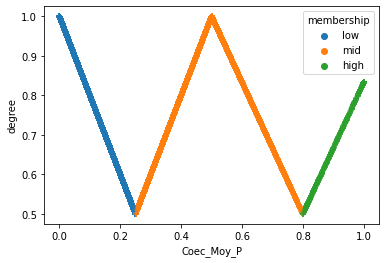

In [3]:
data = pd.read_csv('all_indicators.csv')
coec = data[data['Coec_Moy_P'] != 0]['Coec_Moy_P']

coec_min = coec.min()
coec_max =  coec.max()                   
coec_mid =  np.median(np.arange(coec_min, coec_max, 0.1))            

coec_object = Fuzzify(coec, coec_min, coec_max, coec_mid)
fuzzified_coec = coec_object.get_membership()

sns.scatterplot(data=fuzzified_coec, x='Coec_Moy_P', y='degree', hue='membership',marker="+")

<AxesSubplot:xlabel='EqContrib', ylabel='degree'>

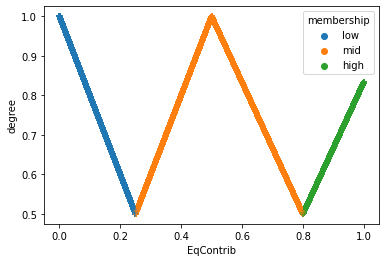

In [4]:
eqcont = data[data['EqContrib'] != 0]['EqContrib']
eqcont_min = eqcont.min()
eqcont_max = eqcont.max()                   
eqcont_mid =  np.median(np.arange(eqcont_min, eqcont_max, 0.1))  

eqcont_object = Fuzzify(eqcont, eqcont_min, eqcont_max, eqcont_mid)

fuzzified_eqcont = eqcont_object.get_membership()
fuzzified_eqcont
sns.scatterplot(data=fuzzified_eqcont, x='EqContrib', y='degree', hue='membership',marker="+")

In [5]:
fuzzified_eqcont[fuzzified_eqcont['EqContrib'] > 0.25].sort_values(by='EqContrib', ascending=True)


,EqContrib,low,mid,high,membership,degree
227777,0.250032,0.499935,0.500065,0.000000,mid,0.500065
188901,0.250046,0.499907,0.500093,0.000000,mid,0.500093
167233,0.250065,0.499869,0.500131,0.000000,mid,0.500131
105032,0.250077,0.499847,0.500153,0.000000,mid,0.500153
258766,0.250098,0.499805,0.500195,0.000000,mid,0.500195
...,...,...,...,...,...,...
113770,1.000000,0.000000,0.166667,0.833333,high,0.833333
190268,1.000000,0.000000,0.166667,0.833333,high,0.833333
7284,1.000000,0.000000,0.166667,0.833333,high,0.833333
87102,1.000000,0.000000,0.166667,0.833333,high,0.833333


In [6]:
#TODO  : rajouter une règle de classification 

In [21]:
fuzzified = pd.read_csv('/Users/anis/test_labnbook/math_ner/indicators/tmp/summary_fuzzy.csv', index_col=0)

In [22]:
fuzzified.columns

Index(['id_mission', 'id_report', 'id_labdoc', 'id_trace', 'n_users',
       'teacher', 'n_tokens', 'n_segments', 'eqc', 'coec', 'eqc_low',
       'eqc_mid', 'eqc_high', 'eqc_membership', 'eqc_degree', 'coec_low',
       'coec_mid', 'coec_high', 'coec_membership', 'coec_degree'],
      dtype='object')

In [23]:
id_missions = fuzzified['id_mission'].unique()

In [27]:
id_mission = 1694
fuzzified[fuzzified['id_mission'] == id_mission]

,id_mission,id_report,id_labdoc,id_trace,n_users,teacher,n_tokens,n_segments,eqc,coec,eqc_low,eqc_mid,eqc_high,eqc_membership,eqc_degree,coec_low,coec_mid,coec_high,coec_membership,coec_degree
0,1694,47089,473857,8365205,2,0,85,2,0.00,0.00,1.00,0.00,0.00,eqc_low,1.00,1.00,0.00,0.00,coec_low,1.00
1,1694,47089,473871,8367765,2,0,72,4,0.30,0.30,0.33,0.67,0.00,eqc_mid,0.67,0.33,0.67,0.00,coec_mid,0.67
2,1694,47089,473885,8365126,2,0,74,3,0.00,0.00,1.00,0.00,0.00,eqc_low,1.00,1.00,0.00,0.00,coec_low,1.00
3,1694,47089,473879,8365212,3,0,41,1,0.49,0.49,0.01,0.92,0.07,eqc_mid,0.92,0.01,0.91,0.08,coec_mid,0.91
4,1694,47089,473876,8365100,2,0,41,2,0.36,0.37,0.20,0.80,0.00,eqc_mid,0.80,0.18,0.82,0.00,coec_mid,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,1694,47369,472047,8243641,2,0,163,13,0.18,0.05,0.60,0.40,0.00,eqc_low,0.60,0.89,0.11,0.00,coec_low,0.89
482,1694,47369,472024,8346948,3,0,988,67,0.45,0.19,0.06,0.90,0.04,eqc_mid,0.90,0.58,0.42,0.00,coec_low,0.58
483,1694,47369,473566,8313779,2,0,95,5,0.70,0.16,0.00,0.60,0.40,eqc_mid,0.60,0.65,0.35,0.00,coec_low,0.65
484,1694,47369,472049,8363052,3,0,376,28,0.37,0.20,0.18,0.82,0.00,eqc_mid,0.82,0.56,0.44,0.00,coec_low,0.56


<AxesSubplot:xlabel='eqc', ylabel='eqc_degree'>

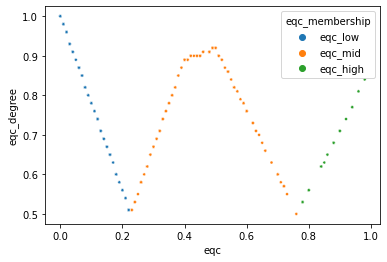

In [25]:
sns.scatterplot(data=fuzzified, x='eqc', y='eqc_degree', hue='eqc_membership',marker=".")

<AxesSubplot:xlabel='coec', ylabel='coec_degree'>

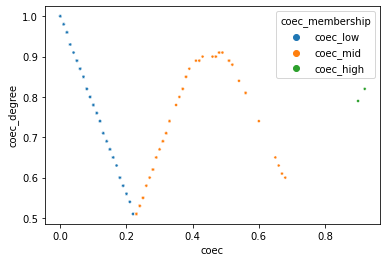

In [26]:
sns.scatterplot(data=fuzzified, x='coec', y='coec_degree', hue='coec_membership',marker=".")

In [28]:
fuzzified_mission = fuzzified[fuzzified['id_mission'] == id_mission]


In [29]:
id_labdoc = 

,id_mission,id_report,id_labdoc,id_trace,n_users,teacher,n_tokens,n_segments,eqc,coec,eqc_low,eqc_mid,eqc_high,eqc_membership,eqc_degree,coec_low,coec_mid,coec_high,coec_membership,coec_degree
0,1694,47089,473857,8365205,2,0,85,2,0.00,0.00,1.00,0.00,0.00,eqc_low,1.00,1.00,0.00,0.00,coec_low,1.00
1,1694,47089,473871,8367765,2,0,72,4,0.30,0.30,0.33,0.67,0.00,eqc_mid,0.67,0.33,0.67,0.00,coec_mid,0.67
2,1694,47089,473885,8365126,2,0,74,3,0.00,0.00,1.00,0.00,0.00,eqc_low,1.00,1.00,0.00,0.00,coec_low,1.00
3,1694,47089,473879,8365212,3,0,41,1,0.49,0.49,0.01,0.92,0.07,eqc_mid,0.92,0.01,0.91,0.08,coec_mid,0.91
4,1694,47089,473876,8365100,2,0,41,2,0.36,0.37,0.20,0.80,0.00,eqc_mid,0.80,0.18,0.82,0.00,coec_mid,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,1694,47369,472047,8243641,2,0,163,13,0.18,0.05,0.60,0.40,0.00,eqc_low,0.60,0.89,0.11,0.00,coec_low,0.89
482,1694,47369,472024,8346948,3,0,988,67,0.45,0.19,0.06,0.90,0.04,eqc_mid,0.90,0.58,0.42,0.00,coec_low,0.58
483,1694,47369,473566,8313779,2,0,95,5,0.70,0.16,0.00,0.60,0.40,eqc_mid,0.60,0.65,0.35,0.00,coec_low,0.65
484,1694,47369,472049,8363052,3,0,376,28,0.37,0.20,0.18,0.82,0.00,eqc_mid,0.82,0.56,0.44,0.00,coec_low,0.56


In [44]:
fuzzified_mission[fuzzified_mission['id_labdoc'] == 473857]['coec_membership'].values[0]

'coec_low'

In [35]:
# select a value from the membership function
fuzzified_mission[fuzzified_mission['id_labdoc'] == 473857]['coec_membership'].max()

'coec_low'